In [1]:
import numpy as np
import nimfa
from nimfa.examples import cbcl_images
from PIL import Image, ImageOps
from sklearn.decomposition import PCA

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
def plot_basis_vectors(W, ax):
    """
    Plot basis vectors.
    
    :param W: Basis matrix of the fitted factorization model.
    :type W: `numpy.matrix`
    """
    assert len(W.shape) == 2
    
    # Images must be square:
    r_img = int(np.sqrt(W.shape[0]))
    assert r_img ** 2 == W.shape[0]
    
    # Arrange number of basis vectors in a grid:
    c_grid = int(np.floor(np.sqrt(W.shape[1])))
    r_grid = int(np.ceil(W.shape[1] / c_grid))
    
    blank = Image.new("L", (c_grid * (r_img + 1) - 1, r_grid * (r_img + 1) - 1))
    for i in range(r_grid):
        for j in range(c_grid):
            basis = np.array(W[:, c_grid * i + j]).reshape((r_img, r_img))
            basis = basis / np.max(basis) * 255
            basis = 255 - basis
            ima = Image.fromarray(basis)
            ImageOps.expand(ima, border=1, fill='black')
            blank.paste(ima.copy(), (j * r_img + j, i * r_img + i))
    ax.imshow(blank, cmap='gray')

In [3]:
V = cbcl_images.preprocess(cbcl_images.read())
V.shape

Reading CBCL faces database
Data preprocessing


(361, 2429)

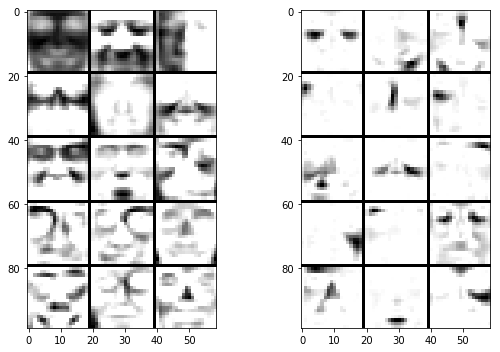

In [4]:
fig, ax = plt.subplots(ncols=2, figsize=(8, 5))

# PCA: holistic
pca = PCA(whiten=True)
pca.fit(V.T)
plot_basis_vectors(pca.components_[:15, :].T, ax[0])

# NMF: parts-based
nmf = nimfa.Lsnmf(V, seed="random_vcol", rank=49, max_iter=50, sub_iter=10,
               inner_sub_iter=10, beta=0.1, min_residuals=1e-8)
plot_basis_vectors(nmf().basis()[:, :15], ax[1])

fig.tight_layout()
fig.savefig('fig1B-PCA-vs-NMF.eps')